In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the encoding for GPT 3 and 4


In [27]:
with open("data/scraped_data.jsonl") as f:
    lines = f.read().splitlines()

In [28]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
df_inter['json_element'].apply(json.loads)
df = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [29]:
df.describe()

,content,url
count,2580,2580
unique,1598,2580
top,404 - Not found,https://dune.com/docs/
freq,804,1


In [30]:
df["content"].value_counts().head(20)
# some of these content are not worth embedding, so we will remove them

content
404 - Not found                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           804
                                  

In [31]:
removed_content = df["content"].value_counts().head(20).reset_index().loc[0:14]["content"].values
removed_content

array(['404 - Not found', '', '区块表 ¶ \n ', '交易表 ¶ \n ',
       'Please wait \n This application is starting, you will be redirected once it is ready. \n If your are the application owner, check your logs for details.',
       '内部合约调用表 ¶ \n ', '事件日志表 ¶ \n ',
       '原始数据表 ¶ \n \n \n 区块表（Blocks）  (blocks/) \n 交易表（Transactions）  (transactions/) \n 事件日志表（Logs）  (event-logs/) \n 内部合约调用表（Traces）  (traces/)',
       'Example ¶ \n \n ',
       'traces中的gas使用 ¶ \n \n 一个trace中的 gas_used 包括该trace和它所有的子trace所消耗的gas。 \n 最初调用的 gas_used 不包括首先进行调用的费用。 \n 您需要把21000个gas单位+发送0的费用+非零字节的费用加到顶部trace的 gas_used 值中，以得出"真正的" gas_used 值。 \n 关于这个问题的更多阅读请参考这个 stackexchange条目  (https://ethereum.stackexchange.com/questions/31443/what-do-the-response-values-of-a-parity-trace-transaction-call-actually-repres) \n 在dune中做的一个查询。 https://dune.com/queries/895857  (https://dune.com/queries/895857)',
       'Column Data ¶ \n ', 'Example Request ¶ \n ',
       'Feedback and Suggestions ¶ \n We appreciate your feedback and sug

In [32]:
df_cleaned = df[~df["content"].isin(removed_content)]
print(f"With the data cleaning, I have removed {df.shape[0] - df_cleaned.shape[0]} rows")
print(f"There are still {df_cleaned["content"].duplicated().sum()} duplicates left")
df_cleaned["content"].value_counts().head(20).reset_index()

With the data cleaning, I have removed 935 rows
There are still 62 duplicates left


,content,count
0,Skip to content\n (#start-building) \...,3
1,Start building ¶ \n Ready to start building? O...,3
2,Resources and Support ¶ \n For assistance with...,3
3,Querying a query ¶ \n DuneSQL allows you to qu...,3
4,Raw data tables ¶ \n \n \n Blocks (blocks/) \...,3
5,Writing efficient queries ¶ \n An efficient qu...,3
6,Using DuneSQL ¶ \n DuneSQL is our query engine...,3
7,DuneSQL Features ¶ \n DuneSQL offers several u...,3
8,Skip to content\n (#dunesql-features)...,3
9,¶,3


In [33]:
df["url"].value_counts()
# there are no duplicate URLs

url
https://dune.com/docs/                                                          1
https://dune.com/docs/zh/reference/v2/community/reservoir/token-attributes/     1
https://dune.com/docs/zh/reference/v2/raw/polygon/transactions/                 1
https://dune.com/docs/zh/reference/v2/raw/polygon/traces/                       1
https://dune.com/docs/zh/reference/v2/raw/polygon/event-logs/                   1
                                                                               ..
https://dune.com/docs/learning/how-tos/create-and-manage-teams/                 1
https://dune.com/docs/learning/how-tos/create-ai-assisted-queries/              1
https://dune.com/docs/learning/how-tos/                                         1
https://dune.com/docs/learning/how-tos/find-datasets/#categories-of-datasets    1
https://dune.com/docs/api/api-reference/edit-queries/#error-code-summary        1
Name: count, Length: 2580, dtype: int64

In [34]:
# write 5 samples to a markdown file
samples = df_cleaned["content"].head(5).values
for i, sample in enumerate(samples):
    with open(f"sample_{i}.md", "w", encoding="utf-8") as f:
        f.write(sample)

In [35]:
df_cleaned["content"].head(1).values[0]

"Skip to content\n          (#start-building) \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n  (https://github.com/duneanalytics/docs/edit/master/docs/index.md) \n Welcome \n Dune is a web-based platform that allows you to query public blockchain data and aggregate it into beautiful dashboards. \n \n Quickstart \n To get started with Dune in 5 minutes, see the  Quickstart  (quickstart/) . \n \n \n \n The world's blockchain data at your fingertips! \n \n Blockchains are open and transparent, but each chain is unique—making it difficult to understand, ingest, and aggregate data. Dune gives you the proper tools to analyze cross-chain data for different tokens, wallets, and protocols. You can also easily share your work with the community. \n "

In [36]:
# How long are the articles in tokens?
df_cleaned.loc[:, "len"] = df_cleaned["content"].apply(lambda s: len(enc.encode(s)))

C:\Users\du-wa\AppData\Local\Temp\ipykernel_3212\307835654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "len"] = df_cleaned["content"].apply(lambda s: len(enc.encode(s)))


In [37]:
df_cleaned["len"].describe()

count    1645.000000
mean      265.534954
std       432.525704
min         1.000000
25%        52.000000
50%       121.000000
75%       296.000000
max      6126.000000
Name: len, dtype: float64

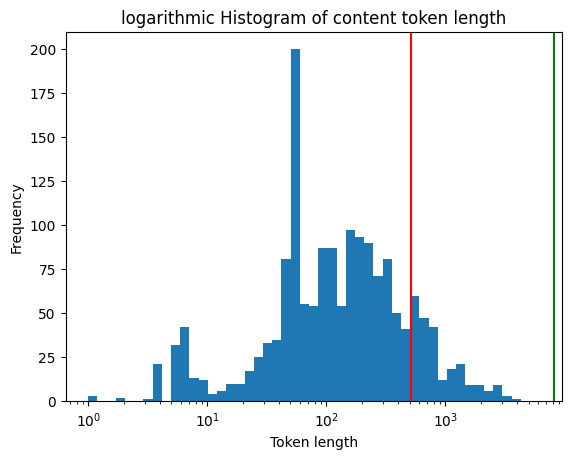

In [38]:
# df_cleaned["len"].hist(bins=100)

# make a histogram of the thread token length
plt.hist(df_cleaned["len"].values, bins = 10 ** np.linspace(np.log10(1), np.log10(6126), 50))
plt.xscale("log")
plt.xlabel("Token length")
plt.ylabel("Frequency")
plt.title("logarithmic Histogram of content token length")
plt.axvline(x=512, color="red")
plt.axvline(x=8191, color="green")
plt.show()

## Create the index with Llama index

In [43]:
from llama_index.core import Settings
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the encoding for GPT 3 and 4

llm = OpenAI(model="gpt-3.5-turbo")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-large", embed_batch_size=512)
Settings.llm = llm

In [40]:
from llama_index.core import Document
documents = [Document(content=content) for content in df_cleaned["content"].values]
document = Document(text="\n\n".join([content for content in df_cleaned["content"].values]))

In [41]:
from utils import build_sentence_window_index

sentence_index = build_sentence_window_index(
    document,
    llm,
    embed_model="text-embedding-3-large",
    save_dir="sentence_index"
)

✅ In Answer Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Answer Relevance, input response will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Context Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Context Relevance, input response will be set to __record__.app.query.rets.source_nodes[:].node.text .
✅ In Groundedness, input source will be set to __record__.app.query.rets.source_nodes[:].node.text .
✅ In Groundedness, input statement will be set to __record__.main_output or `Select.RecordOutput` .


[nltk_data] Downloading package punkt to C:\Users\du-
[nltk_data]     wa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ImportError: cannot import name 'ServiceContext' from 'llama_index' (unknown location)

In [42]:
from llama_index.core import VectorStoreIndex
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)

index = VectorStoreIndex.from_documents([documents],
                                        service_context=service_context)

C:\Users\du-wa\AppData\Local\Temp\ipykernel_3212\896718139.py:6: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(


ImportError: `llama-index-embeddings-huggingface` package not found, please run `pip install llama-index-embeddings-huggingface`